## PathTree Visualization Example

In [1]:
from openpathsampling.storage import Storage
from openpathsampling.visualize import PathTreeBuilder, MoveTreeBuilder
from IPython.display import SVG

First load a previously generated trajectory storage object

TODO: Change example directory at some point

In [2]:
storage = Storage('toy_tis.nc', mode='r')

Then create a simple tree builder object. The TreeBuilder knows about the way things should be arranged and what to display. It contains a TreeRenderer() object that is in charge of generating the actual SVG output. The renderer knows about zoom levels and scaling, etc.

In [3]:
ens = list(storage.ensemble)
ens

In [4]:
tree = MoveTreeBuilder(storage)

In [5]:
tree.full(ens)

Finally set some options
- show rejected paths
- show state bars below the snapshot boxes, here for StateA in black
- use a transformed orderparameter, here use psi angles and convert to degrees

and then create the set of drawing commands for this setting from the list of samples

In [6]:
sset = storage.sampleset[1]
print str(sset.movepath)
mp = sset.movepath
submp = mp.movepath.movepaths[2]
submp.mover

CalculationStep : PathSampling : Step # 0 with 0 samples
 +- RandomChoice :
 |   +- RandomChoice :
 |   |   +- SampleMove : ReplicaExchangeMover : False :[]


AttributeError: 'RandomChoiceMovePath' object has no attribute 'movepaths'

In [7]:
mp.traverse_bfs(lambda x : x.mover.__class__.__name__)

['ReplicaExchangeMover', 'NoneType', 'NoneType', 'NoneType']

In [8]:
samp = storage.sample[0]
samp.details.accepted

True

Last, tweak the output to be a little bigger, increase a fontsize and output the SVG to the ipython notebook

In [9]:
print [samp.replica for samp in sset]

[0, 4, 5, 3, 1, 2, -1]


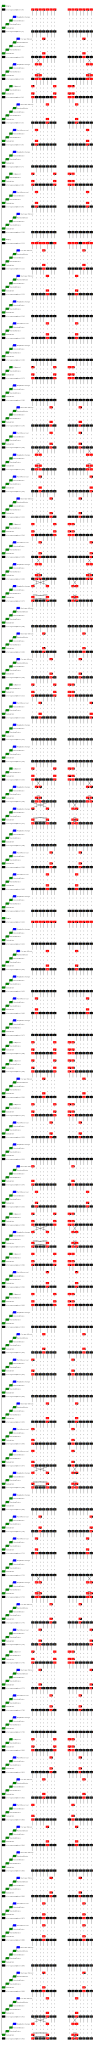

In [10]:
view = tree.renderer
view.zoom = 1.1
view.font_size = 0.35
SVG(view.to_svg())

Or more similar to the old style

In [21]:
tree.rejected = True
tree.states = [('StateA','black')]
tree.op = storage.cv.load('psi').get_transformed_view(lambda x : int(x / 3.141592653 * 180))
tree.from_samples(samples)

AttributeError: 'MoveTreeBuilder' object has no attribute 'from_samples'

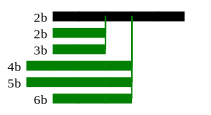

In [7]:
tree.rejected = True
tree.states = []
tree.op = None
tree.from_samples(samples)
view = tree.renderer
view.zoom = 1.1
view.horizontal_gap = -0.01
view.scale_y = 15
view.font_size = 0.8
view.font_family = 'Times'
SVG(view.to_svg())

Let's save the last tree as a pdf (using wkhtmltopdf, which can be downloaded from [wkhtmltopdf.org]())

In [8]:
#! skip
view.save_pdf('mypathtree.pdf')
!open mypathtree.pdf